<a href="https://colab.research.google.com/github/RuanRodrigues10000/ML_RUAN/blob/master/gif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import imageio.v2 as imageio

# Simulation parameters
v0 = 0.5      # velocity
eta = 0.6      # random fluctuation in angle (in radians)
L = 5        # size of box
R = 5.0     # interaction radius
dt = 0.1      # time step
Nt = 200      # number of time steps
N = 100    # number of birds

# Initialize
np.random.seed(30)      # set the random number generator seed

# Bird positions
x = np.random.rand(N, 1) * L
y = np.random.rand(N, 1) * L

# Bird velocities
theta = 2 * np.pi * np.random.rand(N, 1)
vx = v0 * np.cos(theta)
vy = v0 * np.sin(theta)

# Simulation Main Loop
for i in range(Nt):
    # Move
    x += vx * dt
    y += vy * dt

    # Apply periodic BCs
    x = x % L
    y = y % L

    # Find mean angle of neighbors within R
    mean_theta = theta
    for b in range(N):
        neighbors = (x - x[b]) * 2 + (y - y[b]) * 2 < R ** 2
        sx = np.sum(np.cos(theta[neighbors]))
        sy = np.sum(np.sin(theta[neighbors]))
        mean_theta[b] = np.arctan2(sy, sx)

    # Add random perturbations
    theta = mean_theta + eta * (np.random.rand(N, 1) - 0.5)

    # Update velocities
    vx = v0 * np.cos(theta)
    vy = v0 * np.sin(theta)

    # Plot and save each iteration
    plt.figure(figsize=(6, 6), dpi=96)
    plt.quiver(x, y, vx, vy, color='r')
    plt.xlim(0, L)
    plt.ylim(0, L)
    plt.gca().set_aspect('equal', adjustable='box')

    # Save the figure
    img_name = f'imagem_{i}.png'
    plt.savefig(img_name, dpi=120)
    plt.close()

# Create GIF
images = [imageio.imread(f'imagem_{i}.png') for i in range(Nt)]
imageio.mimsave('activematter.gif', images, fps=10)



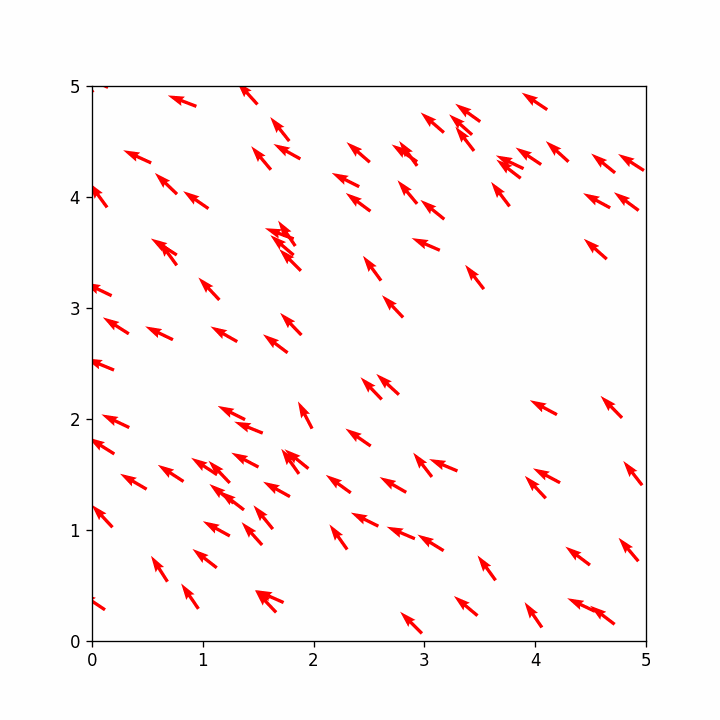

In [ ]:
from IPython.display import display, Image

gif_path = 'activematter.gif'

with open(gif_path, 'rb') as f:
    display(Image(data=f.read(), format='png'))